## 이동평균, 가우시안

In [ ]:
# 이동평균	단순한 추세선, 급격한 변화에 민감
# 가우시안	부드럽고 잡음 제거에 탁월

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


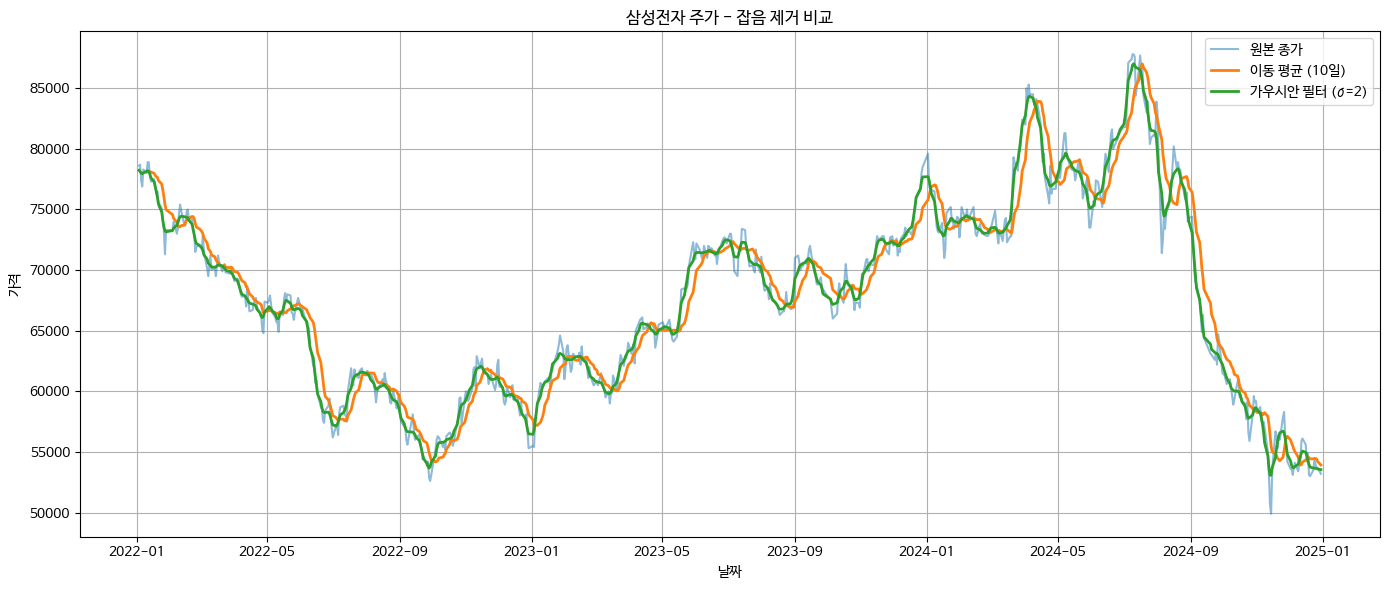

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from scipy.ndimage import gaussian_filter1d

# 1. 삼성전자 주가 데이터 가져오기
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")
df = df[['종가']].copy()
df.dropna(inplace=True)

# 2. 잡음 제거 처리
df['이동평균'] = df['종가'].rolling(window=10).mean()
df['가우시안'] = gaussian_filter1d(df['종가'], sigma=2)

# 3. 시각화 비교
plt.figure(figsize=(14, 6))
plt.plot(df['종가'], label='원본 종가', alpha=0.5)
plt.plot(df['이동평균'], label='이동 평균 (10일)', linewidth=2)
plt.plot(df['가우시안'], label='가우시안 필터 (σ=2)', linewidth=2)
plt.title("삼성전자 주가 - 잡음 제거 비교")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LOESS 평활화

In [ ]:
# LOESS	국소 회귀 기반의 평활화로 비선형 추세까지 파악 가능

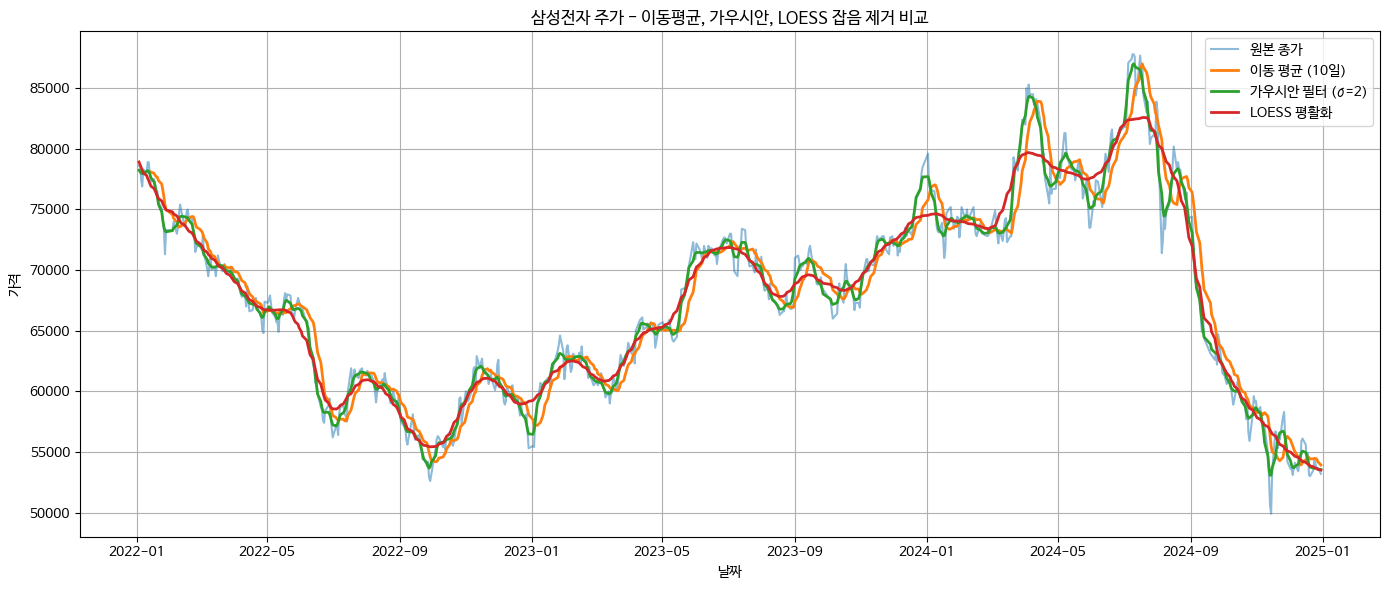

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from scipy.ndimage import gaussian_filter1d
from statsmodels.nonparametric.smoothers_lowess import lowess

# 1. 삼성전자 주가 데이터 가져오기
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")
df = df[['종가']].copy()
df.dropna(inplace=True)

# 2. 잡음 제거 처리
df['이동평균'] = df['종가'].rolling(window=10).mean()
df['가우시안'] = gaussian_filter1d(df['종가'], sigma=2)

# 3. LOESS 평활화
loess_result = lowess(df['종가'], np.arange(len(df)), frac=0.05)
df['LOESS'] = loess_result[:, 1]

# 4. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df['종가'], label='원본 종가', alpha=0.5)
plt.plot(df['이동평균'], label='이동 평균 (10일)', linewidth=2)
plt.plot(df['가우시안'], label='가우시안 필터 (σ=2)', linewidth=2)
plt.plot(df['LOESS'], label='LOESS 평활화', linewidth=2)
plt.title("삼성전자 주가 - 이동평균, 가우시안, LOESS 잡음 제거 비교")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 주가 평활화 + 푸리에 변환 시각화

C:\Users\JYB\AppData\Local\Temp\ipykernel_23928\2988627006.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill')  # 평일 기준 재정렬 및 결측값 보간
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2607
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0492
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0030
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0025
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0022
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022
Epoc

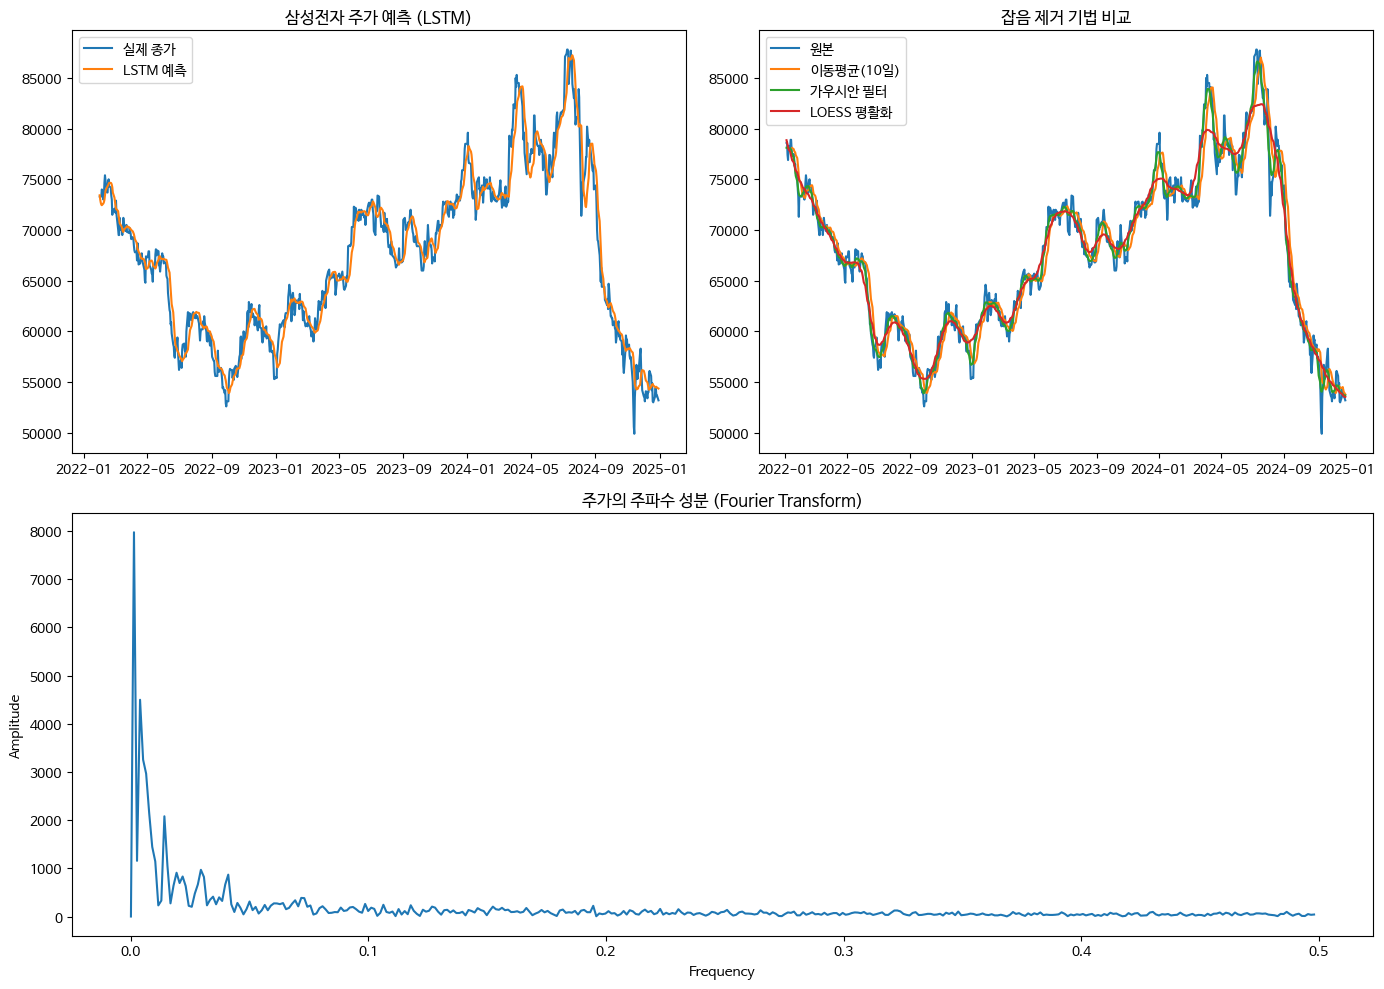

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scipy.ndimage import gaussian_filter1d
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.fft import fft, fftfreq

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")
df = df[['종가']].copy()
df.dropna(inplace=True)
df = df.asfreq('B').fillna(method='ffill')  # 평일 기준 재정렬 및 결측값 보간

# 2. 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 3. 시계열 시퀀스 생성
def create_sequences(data, window=20):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, window=20)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 4. LSTM 모델 정의 및 훈련
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, verbose=1)

# 5. 예측 및 역변환
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
true_prices = scaler.inverse_transform(y)

# 6. 이동평균 (단순)
ma = df['종가'].rolling(window=10).mean()

# 7. 가우시안 필터
gaussian = gaussian_filter1d(df['종가'].values, sigma=3)

# 8. LOESS (로컬 선형회귀)
loess_smoothed = lowess(df['종가'].values, np.arange(len(df)), frac=0.05)[:, 1]

# 9. 푸리에 변환
y_centered = df['종가'].values - np.mean(df['종가'].values)
N = len(y_centered)
yf = fft(y_centered)
xf = fftfreq(N, d=1)[:N//2]

# 10. 시각화
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df.index[-len(true_prices):], true_prices, label='실제 종가')
plt.plot(df.index[-len(predicted_prices):], predicted_prices, label='LSTM 예측')
plt.title("삼성전자 주가 예측 (LSTM)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['종가'], label='원본')
plt.plot(df.index, ma, label='이동평균(10일)')
plt.plot(df.index, gaussian, label='가우시안 필터')
plt.plot(df.index, loess_smoothed, label='LOESS 평활화')
plt.title("잡음 제거 기법 비교")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("주가의 주파수 성분 (Fourier Transform)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
